# Decision Tree in ML

In [ ]:
# It's a Supervised ml algorithm, and we can use it for both Regression problem and classification
# Regression: Simple linear Regression, Multiple Liner Regression
# Classification: Binary, Multiclass classification

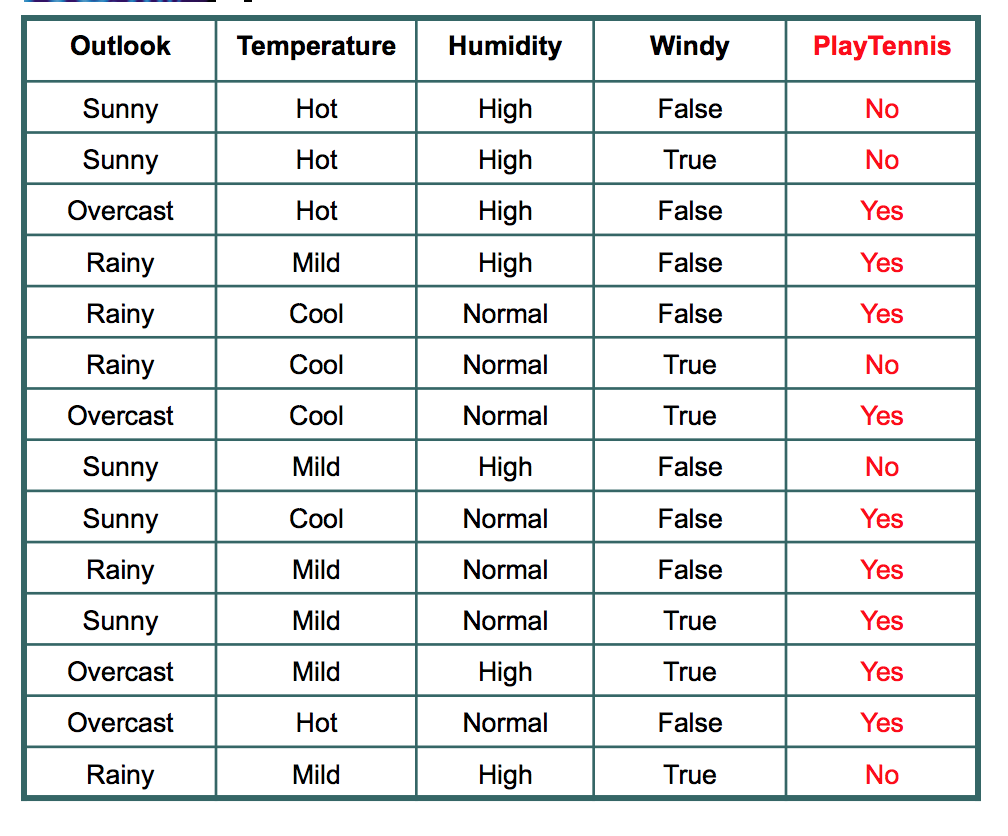

In [ ]:
# Q1: Candidate 1: Mental State: 100%
# Q2: Candidate 2: Mental State: 50%
# Q3: Candidate 3: Metal State: 20%
# Q4: Candidate 4: Mental State: 10%

# Dish: Pizza
# P1: Impurity Level : 100%
# P2: IP : 50%
# P3: IP : 20%
# P4: IP : 0%: Ideal: 10%

In [ ]:
# one who has/have the lowest impurity is the right candidate for root node
# lowest the impurity level better the root node it will be

In [ ]:
# gini index: just simply check or calulate the level of impurity of a given features

In [ ]:
# Decision Tree : CART Algorithm
# CART :Classification and Regression Tree

# Medium Link Gini Index: https://medium.com/analytics-vidhya/decision-tree-intuitive-explanation-7e820b399541

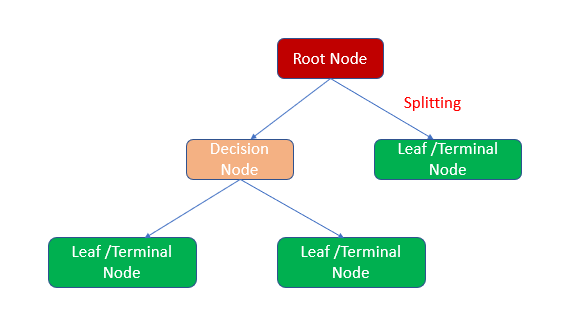

# Step 1: Load Important Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
print('Done')

Done


In [2]:
# step 2: load dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fredericobreno/play-tennis")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'play-tennis' dataset.
Path to dataset files: /kaggle/input/play-tennis


In [5]:
file_name = os.listdir(path)[0]
file_path = path + '/' + file_name
print(file_path)

/kaggle/input/play-tennis/play_tennis.csv


In [7]:
tennis_df = pd.read_csv(file_path)
tennis_df.sample()

,day,outlook,temp,humidity,wind,play
11,D12,Overcast,Mild,High,Strong,Yes


In [8]:
# Data preprocessing for ML Model

In [10]:
df = tennis_df.drop('day',axis = 1)
df.sample()

,outlook,temp,humidity,wind,play
5,Rain,Cool,Normal,Strong,No


In [11]:
# Textual Data:
# feature Engineering: Text to Numerical

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [17]:
for i in X:
  print(f'Frequency Analysis for {i}')
  print(X[i].value_counts())
  print('--------------------------')

Frequency Analysis for outlook
outlook
Sunny       5
Rain        5
Overcast    4
Name: count, dtype: int64
--------------------------
Frequency Analysis for temp
temp
Mild    6
Hot     4
Cool    4
Name: count, dtype: int64
--------------------------
Frequency Analysis for humidity
humidity
High      7
Normal    7
Name: count, dtype: int64
--------------------------
Frequency Analysis for wind
wind
Weak      8
Strong    6
Name: count, dtype: int64
--------------------------


In [19]:
for i in X:
  print(f'Unique value in feature {i}: ',X[i].unique())
  print('--------------------------')

Unique value in feature outlook:  ['Sunny' 'Overcast' 'Rain']
--------------------------
Unique value in feature temp:  ['Hot' 'Mild' 'Cool']
--------------------------
Unique value in feature humidity:  ['High' 'Normal']
--------------------------
Unique value in feature wind:  ['Weak' 'Strong']
--------------------------


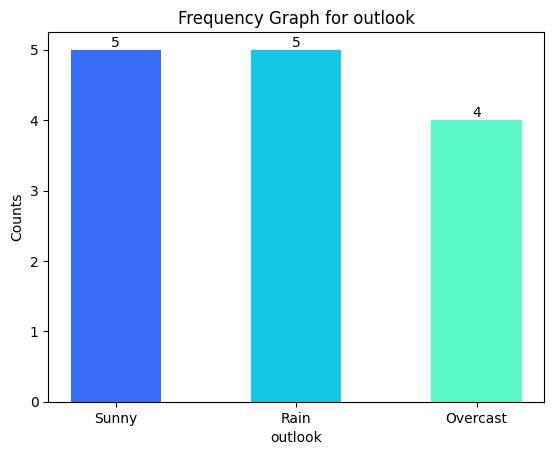

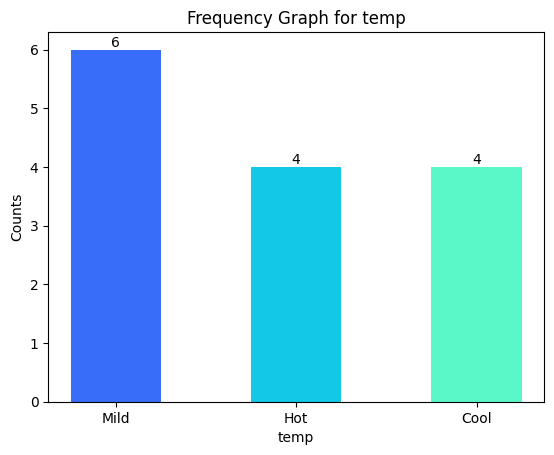

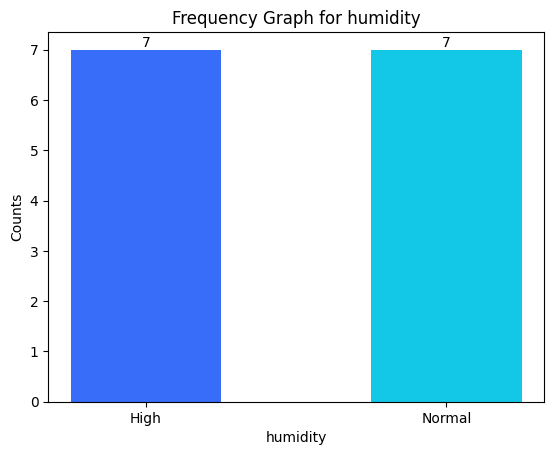

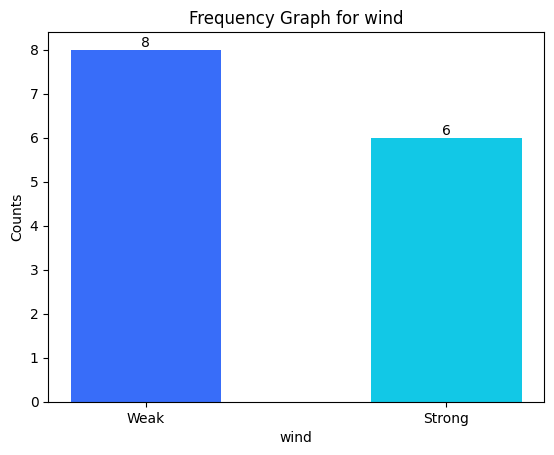

In [25]:
for i in X:
  plt.title(f'Frequency Graph for {i}')
  value_x = X[i].value_counts().index
  value_y = X[i].value_counts().values
  ax = plt.bar(value_x, value_y, color = sns.color_palette('rainbow'), width=0.5)
  plt.bar_label(ax)
  plt.xlabel(f'{i}')
  plt.ylabel('Counts')
  # Rainbow, magma, cool, mako, etc
  plt.show()

In [30]:
# pd.get_dummies(X, dtype=int, drop_first= True)

In [31]:
# Feature Engineering:
# One Hot Encoding : Pd.get_dummies
# Label Encoding
# Ordinal Encoding
# Maping technique

,outlook,temp,humidity,wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak
5,Rain,Cool,Normal,Strong
6,Overcast,Cool,Normal,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
9,Rain,Mild,Normal,Weak


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['outlook'] = le.fit_transform(X['outlook'])
outlook_classes = le.classes_

X['temp'] = le.fit_transform(X['temp'])
temp_classes = le.classes_

X['humidity'] = le.fit_transform(X['humidity'])
humidity_classes = le.classes_

X['wind'] = le.fit_transform(X['wind'])
wind_classes = le.classes_

In [34]:
import string
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [42]:
print('outlook_classes: ',outlook_classes)
print('temp_classes: ',temp_classes)
print('humidity_classes: ',humidity_classes)
print('wind_classes: ',wind_classes)


outlook_classes:  ['Overcast' 'Rain' 'Sunny']
temp_classes:  ['Cool' 'Hot' 'Mild']
humidity_classes:  ['High' 'Normal']
wind_classes:  ['Strong' 'Weak']


In [41]:
X

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [45]:
# Sparse_matrix
y = y.map({'No':0, 'Yes':1})
y

,play
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [46]:
X.sample()

,outlook,temp,humidity,wind
9,1,2,1,1


In [47]:
y.sample()

,play
1,0


In [48]:
# Model Building< Divide Dataset into train_test_split

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size=0.2)

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0])

In [54]:
y_test.values

array([1, 1, 0])

In [58]:
# testing score
model.score(X_test,y_test)

1.0

In [59]:
# Training Score
model.score(X_train,y_train)

1.0

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [62]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [0, 2]])

In [63]:
precision_score(y_test,y_pred)

1.0

In [64]:
accuracy_score(y_test,y_pred)

1.0

In [65]:
recall_score(y_test,y_pred)

1.0

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [96]:
def player_decision():
  import IPython
  user_data = []
  all_classes = [outlook_classes, temp_classes,humidity_classes,wind_classes]

  for index,value in enumerate(X):
    ans = input(f'Enter value of {value}: ({all_classes[index]}): ').capitalize()
    dict_ix = dict(zip(all_classes[index], range(0,len(all_classes[index]))))
    value = dict_ix[ans]
    user_data.append(value)

  print()
  final_ans  = model.predict([user_data])[0]
  if final_ans == 0:
    print('❌Player Will Not Play Tennis❌')

  else:
    url = 'https://media2.giphy.com/media/v1.Y2lkPTZjMDliOTUyYXZkNHU4a2wxd3hkYmh4djc5bzlxeDl1MHAyMTU3dWNsaDd1YzNieiZlcD12MV9naWZzX3NlYXJjaCZjdD1n/idutfwtZx03KfAGZXR/giphy.gif'
    print('🎾Player Will Play Tennis🎾')
    display(IPython.display.Image(url, width = 200, height = 200))

Enter value of outlook: (['Overcast' 'Rain' 'Sunny']): Overcast
Enter value of temp: (['Cool' 'Hot' 'Mild']): Hot
Enter value of humidity: (['High' 'Normal']): Normal
Enter value of wind: (['Strong' 'Weak']): Weak

🎾Player Will Play Tennis🎾


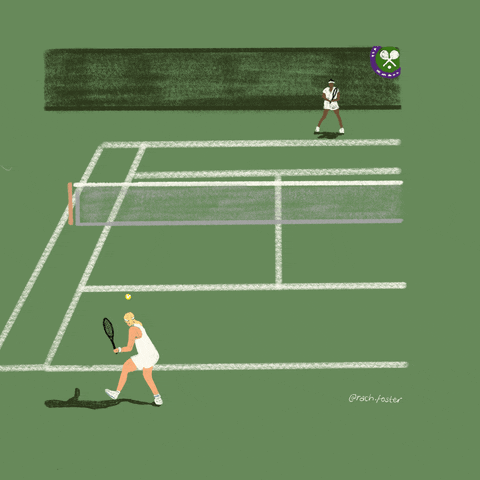

In [97]:
player_decision()

In [78]:
dict(zip(outlook_classes, range(0,len(outlook_classes))))

{'Overcast': 0, 'Rain': 1, 'Sunny': 2}

In [82]:
# dict(zip(('Aman','karan'),(123,234)))

In [98]:
from sklearn.tree import plot_tree

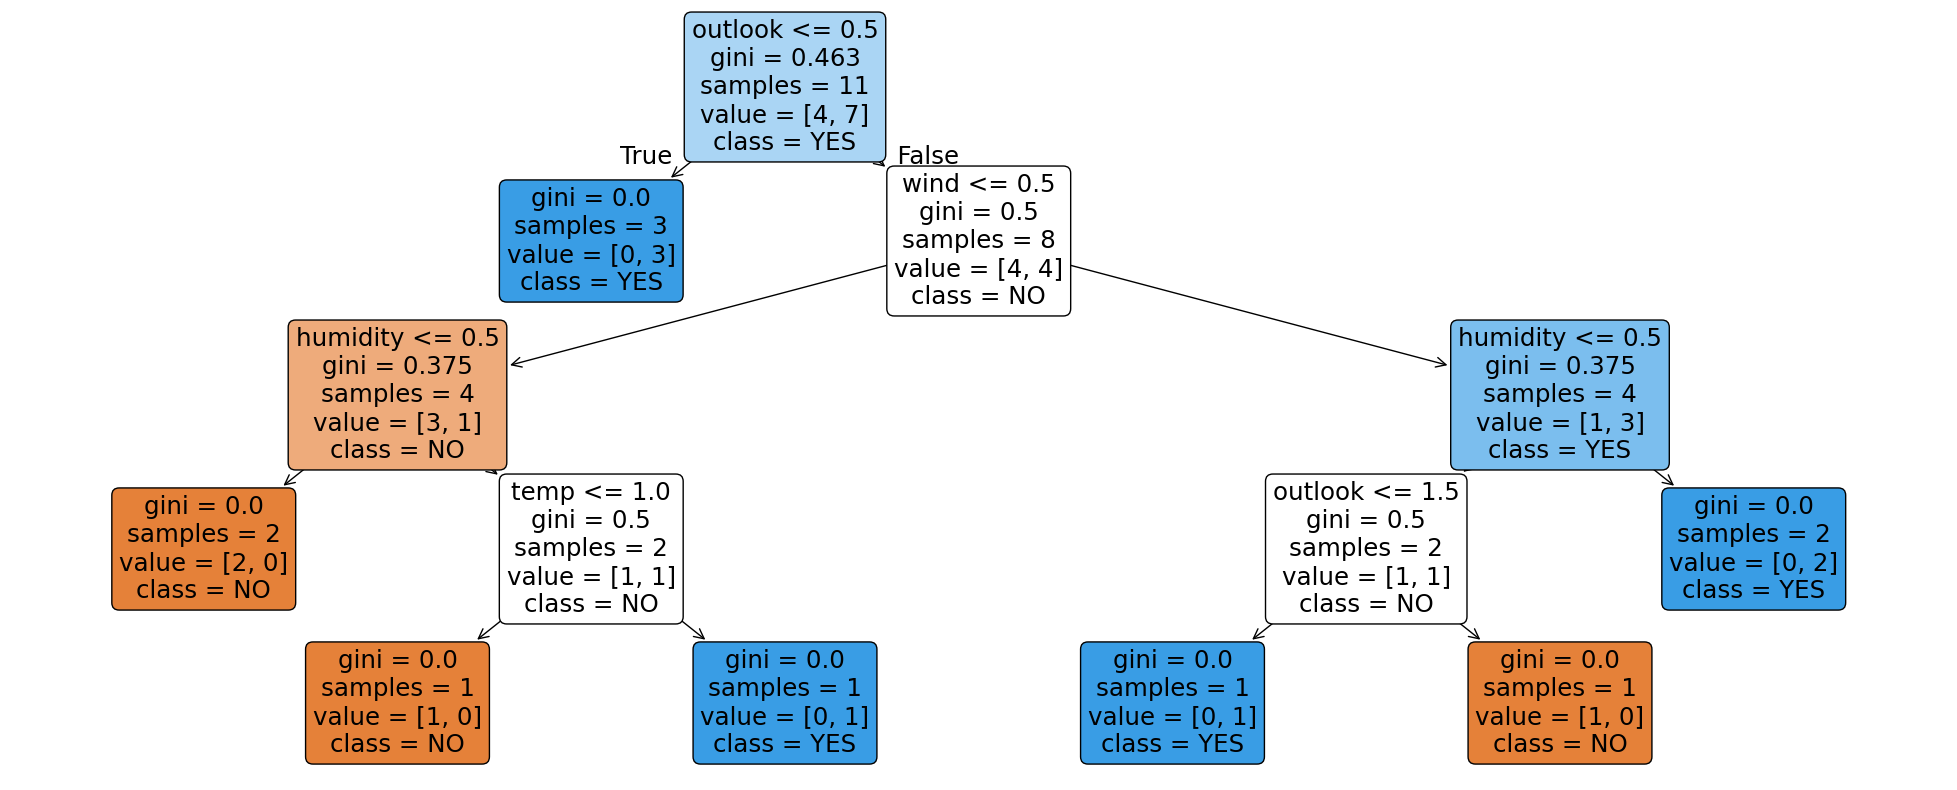

In [105]:
plt.figure(figsize = (25,10))
plot_tree(model,filled=True,rounded = True, class_names = ['NO', 'YES'], feature_names = X.columns)
plt.show()